In [6]:
import matplotlib.pyplot as plt 
import pandas  as pd
import os 

In [9]:
ls

5/  5_stock/  preprocessing.ipynb*


In [14]:
folder_path= '4_stock'

os.listdir(folder_path)

['HDL.csv', 'SHIVM.csv', 'STC.csv', 'UNL.csv']

In [15]:
dataset= {} 
for filenmae in os.listdir(folder_path):
    if filenmae.endswith('.csv'):
        file_path= os.path.join(folder_path, filenmae)

        #read csv 
        name= filenmae.split('.')[0]
        dataset[name]= (pd.read_csv(file_path))
        

        

In [16]:
dataset.keys()


dict_keys(['HDL', 'SHIVM', 'STC', 'UNL'])

In [17]:
## check the shape of all datasets

# Loop through each dataframe in the dataset
for name, df in dataset.items():
    print(f"{name}: {df.shape}")


HDL: (1242, 9)
SHIVM: (740, 9)
STC: (643, 9)
UNL: (1045, 9)


# **Date Alignment for Stock Datasets**


In [21]:
market = pd.read_csv('nepse.csv')
stock_dates = set.intersection(*(set(df['Date']) for df in dataset.values()))


# Market index dates
market_dates = set(market['date'])

# Intersection of all dates (Stocks + Market)
common_dates = stock_dates.intersection(market_dates)



common_dates = stock_dates.intersection(market_dates)

## FILTER STOCK AND MARKET  dataframe
for name in dataset:
    dataset[name] = dataset[name][dataset[name]['Date'].isin(common_dates)].reset_index(drop=True)

# Filter market DataFrame
market = market[market['date'].isin(common_dates)].reset_index(drop=True)

In [22]:
market['close']

0      2,027.32
1      2,030.59
2      2,076.67
3      2,086.42
4      2,037.64
         ...   
454    1,140.98
455    1,203.13
456    1,265.57
457    1,256.04
458    1,272.49
Name: close, Length: 459, dtype: object

In [43]:
## CONVER STRING INTO FLOAT AND REMOVING COMMA
numeric_columns = ['open', 'high', 'low', 'close', 'change', 'pct_change', 'turnover']

# Remove commas and convert to float
for col in numeric_columns:
    market[col] = market[col].astype(str).str.replace(',', '').astype(float)

# Check the cleaned DataFrame
market

,SN,open,high,low,close,change,pct_change,turnover,date
0,13,2051.50,2079.30,2023.13,2027.32,-16.60,-0.81,1.806205e+09,2022-07-07
1,15,2078.63,2091.29,2026.37,2030.59,-46.08,-2.22,2.968485e+09,2022-07-05
2,16,2095.62,2148.16,2059.25,2076.67,-9.75,-0.47,4.349274e+09,2022-07-04
3,17,2028.79,2086.42,2021.00,2086.42,57.65,2.84,2.480474e+09,2022-07-03
4,19,1966.86,2037.64,1966.86,2037.64,74.93,3.82,2.458619e+09,2022-06-30
...,...,...,...,...,...,...,...,...,...
454,626,1139.92,1147.85,1137.87,1140.98,1.73,0.15,1.772790e+08,2019-09-23
455,646,1209.70,1210.24,1199.31,1203.13,-6.49,-0.54,3.805966e+08,2019-08-26
456,664,1259.53,1267.73,1257.91,1265.57,6.20,0.49,3.700020e+08,2019-07-31
457,682,1262.98,1263.82,1255.01,1256.04,-4.43,-0.35,5.405295e+08,2019-07-07


In [25]:
dataset.keys()

dict_keys(['HDL', 'SHIVM', 'STC', 'UNL'])

In [44]:
share = pd.DataFrame()
share['HDL'] = dataset['HDL']["Closing Price"]
share["SHIVM"] = dataset['SHIVM']["Closing Price"]
share['STC'] = dataset['STC']["Closing Price"]
share['UNL'] = dataset['UNL']["Closing Price"]
share



share.index= dataset['HDL']['Date']

## make new df 
share.to_csv("processed_stock.csv")
market.to_csv("market.csv")
share

,HDL,SHIVM,STC,UNL
Date,,,,
2019-06-12,1717.0,665.0,484.0,19696.0
2019-07-07,1685.0,616.0,484.0,20250.0
2019-07-31,1578.0,602.0,493.0,20195.0
2019-08-26,1560.0,573.0,603.0,19600.0
2019-09-23,1473.0,553.0,658.0,18621.0
...,...,...,...,...
2022-06-30,3405.0,774.0,3585.0,18700.0
2022-07-03,3625.0,830.0,3989.7,18335.0
2022-07-04,3600.0,826.0,4263.0,18400.0


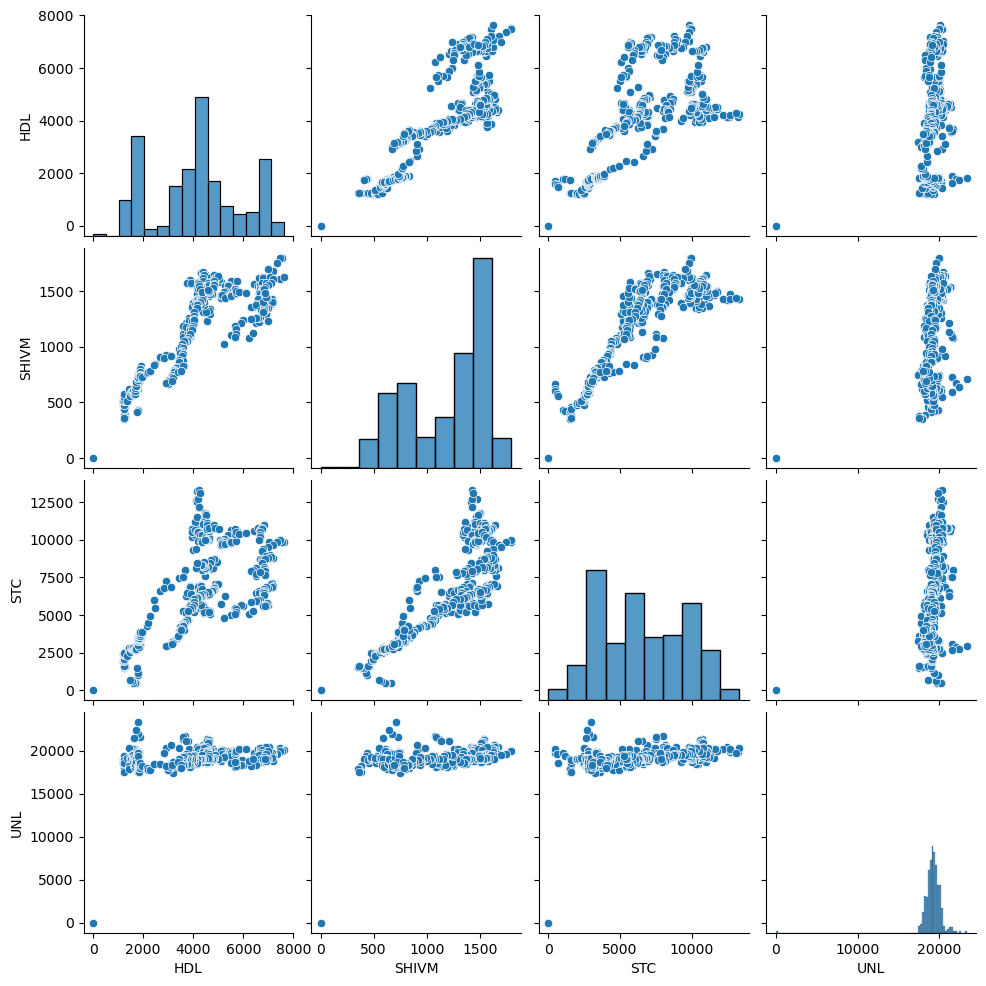

In [38]:
import seaborn as sns 
sns.pairplot(share)

In [183]:
import pandas 

In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = pd.read_csv("UNL.csv")
df.index= df['Date']
df = df.drop(columns=['Unnamed: 0'])
# df= df.drop(columns=['SN'])

df = df.drop(columns=['Date'])
df

,No. Of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Amount,Previous Closing,Difference Rs.
Date,,,,,,,,
2019-06-12,5.0,19700.0,19310.0,19696.0,90.0,1749560.0,19700.0,-4.0
2019-07-07,1.0,20250.0,20250.0,20250.0,10.0,202500.0,20035.0,215.0
2019-07-31,1.0,20195.0,20195.0,20195.0,10.0,201950.0,20000.0,195.0
2019-08-26,2.0,20000.0,19600.0,19600.0,20.0,396000.0,20000.0,-400.0
2019-09-23,1.0,18621.0,18621.0,18621.0,10.0,186210.0,19000.0,-379.0
...,...,...,...,...,...,...,...,...
2022-06-30,2.0,18700.0,18350.0,18700.0,20.0,370500.0,18350.0,350.0
2022-07-03,1.0,18335.0,18335.0,18335.0,10.0,183350.0,18700.0,-365.0
2022-07-04,2.0,18500.0,18400.0,18400.0,20.0,369000.0,18335.0,65.0


In [185]:
df = df.rename(columns={
        'Date': 'date',
        'Max Price': 'high',
        'Min Price': 'low',
        'Closing Price': 'close',
        'Previous Closing': 'open',
        'Traded Shares': 'volume'
    })

In [186]:
df.isnull().sum()

No. Of Transaction    0
high                  0
low                   0
close                 0
volume                0
Amount                0
open                  0
Difference Rs.        0
dtype: int64

In [187]:

# Add technical indicators
def add_technical_indicators(df):

    # Moving Averages
    df['MA20'] = df['close'].rolling(window=20).mean()
    df['MA50'] = df['close'].rolling(window=50).mean()

    # Daily Returns

    df['Daily_Returns'] = df['close'].pct_change()

    
    # Volatility (20-day rolling standard deviation of daily returns)
    df['Volatility'] = df['Daily_Returns'].rolling(window=20).std()



     # Exponential Moving Average (EMA)
    df['EMA20'] = df['close'].ewm(span=20, adjust=False).mean()
    df['EMA50'] = df['close'].ewm(span=50, adjust=False).mean()

    # Relative Strength Index (RSI)
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Bollinger Bands (20-day SMA and 2 standard deviations)
    df['Bollinger_MA20'] = df['close'].rolling(window=20).mean()
    df['Bollinger_Upper'] = df['Bollinger_MA20'] + 2 * df['close'].rolling(window=20).std()
    df['Bollinger_Lower'] = df['Bollinger_MA20'] - 2 * df['close'].rolling(window=20).std()

    # MACD (Moving Average Convergence Divergence)
    df['EMA12'] = df['close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    

    return df



In [188]:
df.columns

Index(['No. Of Transaction', 'high', 'low', 'close', 'volume', 'Amount',
       'open', 'Difference Rs.'],
      dtype='object')

In [189]:
df = add_technical_indicators(df)
df.isnull().sum()


No. Of Transaction     0
high                   0
low                    0
close                  0
volume                 0
Amount                 0
open                   0
Difference Rs.         0
MA20                  19
MA50                  49
Daily_Returns          1
Volatility            40
EMA20                  0
EMA50                  0
RSI                   13
Bollinger_MA20        19
Bollinger_Upper       19
Bollinger_Lower       19
EMA12                  0
EMA26                  0
MACD                   0
MACD_Signal            0
dtype: int64

In [190]:
(df.isnull()).sum()

No. Of Transaction     0
high                   0
low                    0
close                  0
volume                 0
Amount                 0
open                   0
Difference Rs.         0
MA20                  19
MA50                  49
Daily_Returns          1
Volatility            40
EMA20                  0
EMA50                  0
RSI                   13
Bollinger_MA20        19
Bollinger_Upper       19
Bollinger_Lower       19
EMA12                  0
EMA26                  0
MACD                   0
MACD_Signal            0
dtype: int64

In [191]:
cleaned_df= df.dropna()
cleaned_df.isnull().sum()

No. Of Transaction    0
high                  0
low                   0
close                 0
volume                0
Amount                0
open                  0
Difference Rs.        0
MA20                  0
MA50                  0
Daily_Returns         0
Volatility            0
EMA20                 0
EMA50                 0
RSI                   0
Bollinger_MA20        0
Bollinger_Upper       0
Bollinger_Lower       0
EMA12                 0
EMA26                 0
MACD                  0
MACD_Signal           0
dtype: int64

In [192]:
columns_to_keep = [
    'open', 'high', 'low', 'close', 'MA20', 'MA50', 'Daily_Returns',
    'Volatility', 'EMA20', 'EMA50', 'RSI', 'Bollinger_MA20',
    'Bollinger_Upper', 'Bollinger_Lower', 'EMA12', 'EMA26', 'MACD',
    'MACD_Signal'
]

cleaned_df= cleaned_df[columns_to_keep]
cleaned_df.head(3)

,open,high,low,close,MA20,MA50,Daily_Returns,Volatility,EMA20,EMA50,RSI,Bollinger_MA20,Bollinger_Upper,Bollinger_Lower,EMA12,EMA26,MACD,MACD_Signal
Date,,,,,,,,,,,,,,,,,,
2020-07-28,19600.0,19600.0,19210.0,19210.0,20164.30,19392.60,-0.019898,0.048189,19644.521409,19579.219096,31.460674,20164.30,22737.681973,17590.918027,19594.750000,19637.524262,-42.774262,44.132030
2020-07-29,19210.0,19210.0,19210.0,19210.0,20143.15,19382.88,0.000000,0.042663,19603.138418,19564.739916,39.350752,20143.15,22741.747296,17544.552704,19535.557692,19605.855798,-70.298106,21.246003
2020-07-30,19210.0,19210.0,19210.0,19210.0,20023.85,19362.08,0.000000,0.035569,19565.696663,19550.828546,50.126072,20023.85,22559.935195,17487.764805,19485.471893,19576.533146,-91.061253,-1.215448


In [193]:
cleaned_df.to_csv("xx_UNL.csv")

################### fucntion

In [194]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def prepare_stock_data(filepath):
    # Read CSV
    df = pd.read_csv(filepath)

    # Set 'Date' as index and drop redundant columns
    df.index = df['Date']
    df = df.drop(columns=['Unnamed: 0', 'Date'])

    # Rename columns to standardized format
    df = df.rename(columns={
        'Max Price': 'high',
        'Min Price': 'low',
        'Closing Price': 'close',
        'Previous Closing': 'open',
        'Traded Shares': 'volume'
    })



    return df


In [195]:
columns_to_keep = [
    'open', 'high', 'low', 'close', 'MA20', 'MA50', 'Daily_Returns',
    'Volatility', 'EMA20', 'EMA50', 'RSI', 'Bollinger_MA20',
    'Bollinger_Upper', 'Bollinger_Lower', 'EMA12', 'EMA26', 'MACD',
    'MACD_Signal'
]

In [196]:
shivam_df= add_technical_indicators(prepare_stock_data("SHIVM_filter.csv")).dropna()
shivam_df.to_csv("xx_SHIVM.csv")

In [197]:
hdl_df= add_technical_indicators(prepare_stock_data("HDL_filter.csv")).dropna()
hdl_df= hdl_df[columns_to_keep]
hdl_df.to_csv("xx_HDL.csv")

In [198]:
stc_df= add_technical_indicators(prepare_stock_data("STC.csv")).dropna()
stc_df= stc_df[columns_to_keep]
stc_df.to_csv("xx_HDL.csv")

In [199]:
pd.read_csv("xx_UNL.csv")

,Date,open,high,low,close,MA20,MA50,Daily_Returns,Volatility,EMA20,EMA50,RSI,Bollinger_MA20,Bollinger_Upper,Bollinger_Lower,EMA12,EMA26,MACD,MACD_Signal
0,2020-07-28,19600.0,19600.0,19210.0,19210.0,20164.300,19392.600,-0.019898,0.048189,19644.521409,19579.219096,31.460674,20164.300,22737.681973,17590.918027,19594.750000,19637.524262,-42.774262,44.132030
1,2020-07-29,19210.0,19210.0,19210.0,19210.0,20143.150,19382.880,0.000000,0.042663,19603.138418,19564.739916,39.350752,20143.150,22741.747296,17544.552704,19535.557692,19605.855798,-70.298106,21.246003
2,2020-07-30,19210.0,19210.0,19210.0,19210.0,20023.850,19362.080,0.000000,0.035569,19565.696663,19550.828546,50.126072,20023.850,22559.935195,17487.764805,19485.471893,19576.533146,-91.061253,-1.215448
3,2020-08-02,19210.0,19210.0,19210.0,19210.0,19817.850,19342.380,0.000000,0.029404,19531.820791,19537.462721,44.779453,19817.850,21840.548175,17795.151825,19443.091602,19549.382543,-106.290941,-22.230547
4,2020-08-03,19210.0,19210.0,19210.0,19210.0,19678.350,19334.580,0.000000,0.027212,19501.171192,19524.621046,50.266374,19678.350,21434.674544,17922.025456,19407.231355,19524.243095,-117.011740,-41.186785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2022-06-30,18350.0,18700.0,18350.0,18700.0,18218.325,18222.086,0.016304,0.024601,18290.783508,18375.953927,52.162686,18218.325,18914.982986,17521.667014,18301.669360,18301.043243,0.626117,-67.277810
386,2022-07-03,18700.0,18335.0,18335.0,18335.0,18204.480,18208.786,-0.019519,0.024563,18294.994602,18374.347891,49.845774,18204.480,18878.854057,17530.105943,18306.797151,18303.558558,3.238593,-53.174529
387,2022-07-04,18335.0,18500.0,18400.0,18400.0,18194.530,18189.188,0.003545,0.024579,18304.995116,18375.353856,62.774275,18194.530,18850.002307,17539.057693,18321.136051,18310.702369,10.433682,-40.452887
388,2022-07-05,18400.0,18300.0,18300.0,18300.0,18216.330,18175.148,-0.005435,0.022833,18304.519391,18372.398803,52.983294,18216.330,18854.283600,17578.376400,18317.884351,18309.909601,7.974750,-30.767359


In [200]:
pd.read_csv("xx_SHIVM.csv")

,Date,No. Of Transaction,high,low,close,volume,Amount,open,Difference Rs.,MA20,...,EMA20,EMA50,RSI,Bollinger_MA20,Bollinger_Upper,Bollinger_Lower,EMA12,EMA26,MACD,MACD_Signal
0,2020-07-28,155.0,630.0,616.0,618.0,34339.0,21351574.0,625.0,-7.0,615.050,...,598.717788,585.566716,55.185185,615.050,718.594498,511.505502,607.301256,592.995540,14.305716,14.190904
1,2020-07-29,245.0,617.0,592.0,595.0,49064.0,29691734.0,618.0,-23.0,610.650,...,598.363713,585.936648,59.126984,610.650,709.404933,511.895067,605.408755,593.144018,12.264737,13.805671
2,2020-07-30,223.0,610.0,586.0,605.0,37889.0,22845911.0,595.0,10.0,604.600,...,598.995740,586.684231,70.044053,604.600,687.086107,522.113893,605.345870,594.022239,11.323631,13.309263
3,2020-08-02,229.0,605.0,579.0,579.0,47024.0,27748467.0,605.0,-26.0,598.100,...,597.091384,586.382888,48.913043,598.100,664.953808,531.246192,601.292659,592.909481,8.383178,12.324046
4,2020-08-03,121.0,594.0,560.0,583.0,13848.0,8060450.0,579.0,4.0,593.650,...,595.749348,586.250226,58.024691,593.650,650.959042,536.340958,598.478404,592.175445,6.302959,11.119828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2022-06-30,1103.0,775.5,710.0,774.0,132607.0,99520630.6,705.0,69.0,732.725,...,742.136451,861.270803,49.185668,732.725,829.559376,635.890624,719.098318,764.182360,-45.084043,-57.043738
386,2022-07-03,803.0,830.0,753.2,830.0,88004.0,69785906.4,768.0,62.0,733.475,...,750.504408,860.044497,57.983193,733.475,833.182211,633.767789,736.160115,769.057741,-32.897626,-52.214516
387,2022-07-04,1893.0,878.0,801.0,826.0,208727.0,175883271.4,830.0,-4.0,734.525,...,757.694465,858.709419,61.791045,734.525,837.782733,631.267267,749.981636,773.275686,-23.294050,-46.430423
388,2022-07-05,1309.0,834.0,778.4,783.0,132174.0,106075305.9,826.0,-43.0,734.075,...,760.104516,855.740422,58.048233,734.075,836.351877,631.798123,755.061384,773.996006,-18.934622,-40.931263


In [202]:
(pd.read_csv("xx_SHIVM.csv")==0 ).isnull().sum()

Date                  0
No. Of Transaction    0
high                  0
low                   0
close                 0
volume                0
Amount                0
open                  0
Difference Rs.        0
MA20                  0
MA50                  0
Daily_Returns         0
Volatility            0
EMA20                 0
EMA50                 0
RSI                   0
Bollinger_MA20        0
Bollinger_Upper       0
Bollinger_Lower       0
EMA12                 0
EMA26                 0
MACD                  0
MACD_Signal           0
dtype: int64

In [136]:
(pd.read_csv("xx_SHIVM.csv")==0 ).isnull().sum()

Date               0
open               0
high               0
low                0
close              0
MA20               0
MA50               0
Daily_Returns      0
Volatility         0
EMA20              0
EMA50              0
RSI                0
Bollinger_MA20     0
Bollinger_Upper    0
Bollinger_Lower    0
EMA12              0
EMA26              0
MACD               0
MACD_Signal        0
dtype: int64

In [146]:
stock_list =["xx_SHIVM", "xx_HDL"]
stock_list

['xx_SHIVM', 'xx_HDL']

In [203]:
models_scalers = {}
simulation_results = {}

for stock in stock_list:
        df = pd.read_csv(f'{stock}.csv')
        features = ['open', 'high', 'low', 'close', 'Volatility']

        # Scaling features
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df[features])
        scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

In [206]:
scaled_df

,open,high,low,close,Volatility
0,-1.592943,-1.631965,-1.601259,-1.604478,2.292862
1,-1.613343,-1.635869,-1.613934,-1.616432,1.994068
2,-1.625365,-1.642613,-1.613934,-1.611361,1.996052
3,-1.620265,-1.651487,-1.628472,-1.630923,1.956484
4,-1.639936,-1.642613,-1.628472,-1.620055,1.938565
...,...,...,...,...,...
385,-1.407154,-1.326710,-1.390266,-1.299809,0.880652
386,-1.291674,-1.193711,-1.304527,-1.153198,1.119714
387,-1.159546,-1.052122,-1.137521,-1.054190,1.183336
388,-1.059985,-1.033878,-1.095770,-1.113240,1.106503


In [205]:
null_checker(scaled_df)

open          0
high          0
low           0
close         0
Volatility    0
dtype: int64

In [209]:
df

,Date,open,high,low,close,MA20,MA50,Daily_Returns,Volatility,EMA20,EMA50,RSI,Bollinger_MA20,Bollinger_Upper,Bollinger_Lower,EMA12,EMA26,MACD,MACD_Signal
0,2020-07-28,2800.0,2755.0,2744.0,2744.0,2770.800,2164.060,-0.020000,0.075650,2679.433908,2210.173541,52.217855,2770.800,3138.032953,2403.567047,2752.240370,2595.675056,156.565314,199.495609
1,2020-07-29,2744.0,2744.0,2710.0,2711.0,2750.400,2208.600,-0.012026,0.070302,2682.440203,2229.813794,56.466302,2750.400,3079.543961,2421.256039,2745.895698,2604.217644,141.678053,187.932098
2,2020-07-30,2711.0,2725.0,2710.0,2725.0,2731.400,2253.420,0.005164,0.070338,2686.493517,2249.232861,64.524949,2731.400,3015.089526,2447.710474,2742.680975,2613.164485,129.516489,176.248976
3,2020-08-02,2725.0,2700.0,2671.0,2671.0,2717.450,2296.980,-0.019817,0.069630,2685.017944,2265.772749,40.744571,2717.450,2982.720051,2452.179949,2731.653133,2617.448598,114.204535,163.840088
4,2020-08-03,2671.0,2725.0,2671.0,2701.0,2709.950,2338.940,0.011232,0.069309,2686.540044,2282.840484,59.550562,2709.950,2967.696897,2452.203103,2726.937266,2623.637590,103.299676,151.732005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2022-06-30,3310.0,3615.0,3310.0,3585.0,3173.650,3722.044,0.167752,0.050374,3263.251946,3824.104316,60.656883,3173.650,3533.502762,2813.797238,3177.315983,3361.201113,-183.885131,-261.355868
386,2022-07-03,3627.0,3989.7,3540.0,3989.7,3197.785,3693.338,0.112887,0.054653,3332.437475,3830.598265,69.179395,3197.785,3691.591262,2703.978738,3302.298139,3407.756587,-105.458447,-230.176384
387,2022-07-04,3989.7,4388.6,3988.0,4263.0,3239.435,3672.598,0.068501,0.055791,3421.062477,3847.555196,74.647887,3239.435,3920.660939,2558.209061,3450.098426,3471.107951,-21.009525,-188.343012
388,2022-07-05,4263.0,4440.0,4100.0,4100.0,3283.435,3660.578,-0.038236,0.054416,3485.723194,3857.454992,70.764273,3283.435,4065.577954,2501.292046,3550.083283,3517.692547,32.390736,-144.196262


In [226]:
import numpy as np

In [235]:
# Handle first row NaN
log_returns = np.log(1 + df['close'].pct_change())

# Check for and handle potential infinity values
if np.isinf(log_returns).any():
    # Find where the infinity values are
    inf_indices = np.where(np.isinf(log_returns))[0]

        
    # Replace infinities with NaN or some other value
    log_returns = log_returns.replace([np.inf, -np.inf], np.nan)

log_returns

/home/ujjwal/anaconda3/envs/dl-env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0           NaN
1     -0.012099
2      0.005151
3     -0.020015
4      0.011169
         ...   
385    0.155081
386    0.106958
387    0.066257
388   -0.038986
389   -0.014742
Name: close, Length: 390, dtype: float64

In [237]:
sigma = np.std(log_returns.dropna()) * np.sqrt(252)


In [238]:
sigma

0.6066757916410331

In [230]:
log_returns = np.log(df['close'] / df['close'].shift(1))
log_returns

/home/ujjwal/anaconda3/envs/dl-env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0           NaN
1     -0.012099
2      0.005151
3     -0.020015
4      0.011169
         ...   
385    0.155081
386    0.106958
387    0.066257
388   -0.038986
389   -0.014742
Name: close, Length: 390, dtype: float64

In [223]:
log_returns[(log_returns == np.inf)]

364    inf
Name: close, dtype: float64

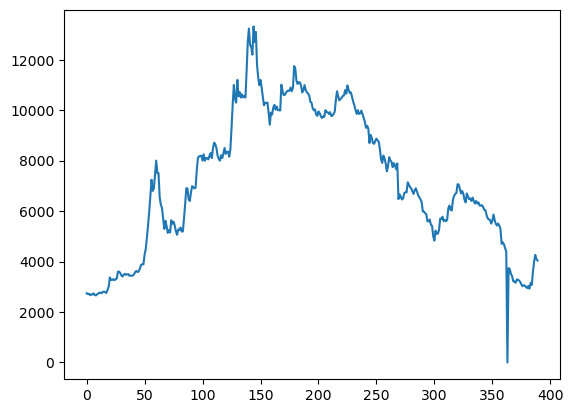

In [244]:
plt.plot(df['close'])

In [243]:
df['close']

0      2744.0
1      2711.0
2      2725.0
3      2671.0
4      2701.0
        ...  
385    3585.0
386    3989.7
387    4263.0
388    4100.0
389    4040.0
Name: close, Length: 390, dtype: float64

In [ ]:
log_returns.isnull()

0       True
1      False
2      False
3      False
4      False
       ...  
385    False
386    False
387    False
388    False
389    False
Name: close, Length: 390, dtype: bool

In [217]:
np.mean(log_returns)

/home/ujjwal/anaconda3/envs/dl-env/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


nan

In [210]:
def calculate_annualized_params(df):
    log_returns = np.log(df['close'] / df['close'].shift(1))
    mu = np.mean(log_returns.dropna()) * 252
    sigma = np.std(log_returns.dropna()) * np.sqrt(252)
    return mu, sigma

In [211]:
calculate_annualized_params(df)

/home/ujjwal/anaconda3/envs/dl-env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ujjwal/anaconda3/envs/dl-env/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


(nan, nan)

In [207]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        output, _ = self.lstm(x)
        out = self.fc(output[:, -1, :])  # last timestep
        return out

# Create sequences from DataFrame
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data.iloc[i - n_steps:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

# Monte Carlo Simulation
def monte_carlo_simulations(last_price, days, mu, sigma, simulations):
    results = np.zeros((days, simulations))
    for sim in range(simulations):
        prices = [last_price]
        for _ in range(days):
            prices.append(prices[-1] * np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal()))
        results[:, sim] = prices[1:]
    return results

# Calculate annualized return and std deviation
def calculate_annualized_params(df):
    log_returns = np.log(df['close'] / df['close'].shift(1))
    mu = np.mean(log_returns.dropna()) * 252
    sigma = np.std(log_returns.dropna()) * np.sqrt(252)
    return mu, sigma

# Training loop
def train_lstm_model(model, train_loader, val_loader, epochs=20, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs.squeeze(), y_batch)
                val_loss += loss.item()
                
        print(f"Epoch {epoch+1}: Train Loss = {train_loss / len(train_loader):.4f}, Val Loss = {val_loss / len(val_loader):.4f}")
    return model

# Main analysis function
def analyze_stocks(stock_list, n_steps, days_to_simulate, simulations):
    models_scalers = {}
    simulation_results = {}

    for stock in stock_list:
        df = pd.read_csv(f'{stock}.csv')
        features = ['open', 'high', 'low', 'close', 'Volatility']

        # Scaling features
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df[features])
        scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

        # Create sequences
        X, y = create_sequences(scaled_df, n_steps)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        X_train = torch.tensor(X_train, dtype=torch.float32)
        y_train = torch.tensor(y_train[:, features.index('close')], dtype=torch.float32)
        X_val = torch.tensor(X_val, dtype=torch.float32)
        y_val = torch.tensor(y_val[:, features.index('close')], dtype=torch.float32)

        train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
        val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32)

        model = LSTMModel(input_size=X_train.shape[2])
        model = train_lstm_model(model, train_loader, val_loader)

        models_scalers[stock] = (model, scaler)

        last_price = df['close'].iloc[-1]
        mu, sigma = calculate_annualized_params(df)

        simulated_prices = monte_carlo_simulations(last_price, days_to_simulate, mu, sigma, simulations)
        simulation_results[stock] = simulated_prices

    return simulation_results


